In [1]:
# This notebook was built in Catherine's vectorenv
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import glob
import datetime
import pylab
import matplotlib as plt
import datetime as datetime  
import statsmodels.api as sm  
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('ggplot')

/Users/ckuhn/anaconda2/envs/vectorenv/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline

In [7]:
%cd /Users/ckuhn/Documents/ABOVE/Data/Landsat8/
NDCI_raw = pd.read_csv('NDCI.csv', low_memory=False)
rgb_raw = pd.read_csv('rgb.csv', low_memory=False)
blueGreen_raw = pd.read_csv('blueGreen.csv', low_memory=False)
nirSWIR_raw = pd.read_csv('nirSWIR.csv', low_memory=False)

/Users/ckuhn/Documents/ABOVE/Data/Landsat8


In [8]:
%cd /Users/ckuhn/Documents/ABOVE/Data/

inSitu = pd.read_csv('AK_lakes_MASTER.csv', low_memory=False)

/Users/ckuhn/Documents/ABOVE/Data


In [9]:
inSitu.head(3)

,site,notes,date,timestamp,trip,lake.code,dup.num,lat,long,elev,...,suva,doc.f.modern,doc.f.modern.er,d13c.corr,age,age.err,d13c.doc,d13c.source,d14c.doc,tblFieldMeasurements.Comments
0,12mile,fall secchi,6/29/16,41088,3,1,1,66.450,145.546,134,...,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9mile,fall secchi,6/30/16,41089,3,2,1,66.186,146.661,122,...,1.71,1.0261,0.0023,*,>Modern,NaN,-15.01,Measured,17.97,NaN
2,abraham,fall secchi,6/30/16,41089,3,3,1,66.189,146.720,120,...,2.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
inSitu.columns

Index([u'site', u'notes', u'date', u'timestamp', u'trip', u'lake.code',
       u'dup.num', u'lat', u'long', u'elev', u'area.km2', u'avg.wind.ms',
       u'siteZmax.m', u'ar.zmax.rat', u'strat.1y.2n', u'zmix.m', u'secchi.m',
       u'Unnamed: 17', u'Unnamed: 18', u'h2otemp', u'airtemp', u'domgl',
       u'dopctsat', u'ph', u'turb.fnu', u'fdom.qse', u'fdom.rfu', u'chla.ugl',
       u'chla.rfu', u'SpCond', u'bp.hpa', u'equil.temp', u'lab.alk',
       u'co2.ppm.sprayer', u'ch4.ppm.sprayer', u'co2.ppm.gc', u'ch4.ppm.gc',
       u'sd.co2.ppm.gc', u'sd.ch4.ppm.gc', u'13co2.permil', u'13ch4.permil',
       u'sd.13co2', u'sd.13ch4', u'd2h2o.pmil', u'dh218o.pmil', u'd13CDICavg',
       u'sd.d13CDICavg', u'd18ODOavg', u'sd.d18ODOavg', u'd17ODOavg',
       u'sd.d17ODOavg', u'o2ar.avg', u'sd.o2ar.ravg', u'doloss.wint.mgl.d',
       u'dic.mgl', u'doc.mgl', u'doc.chl.rat', u'uv', u'suva', u'doc.f.modern',
       u'doc.f.modern.er', u'd13c.corr', u'age', u'age.err', u'd13c.doc',
       u'd13c.source',

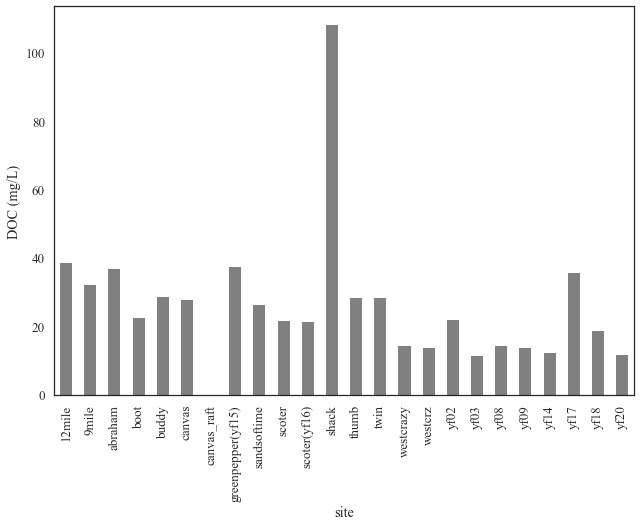

In [11]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

#inSitu = inSitu.dropna()
inSitu.groupby(['site'])['doc.mgl'].mean().plot(kind='bar', color = 'grey')
plt.ylabel('DOC (mg/L)')


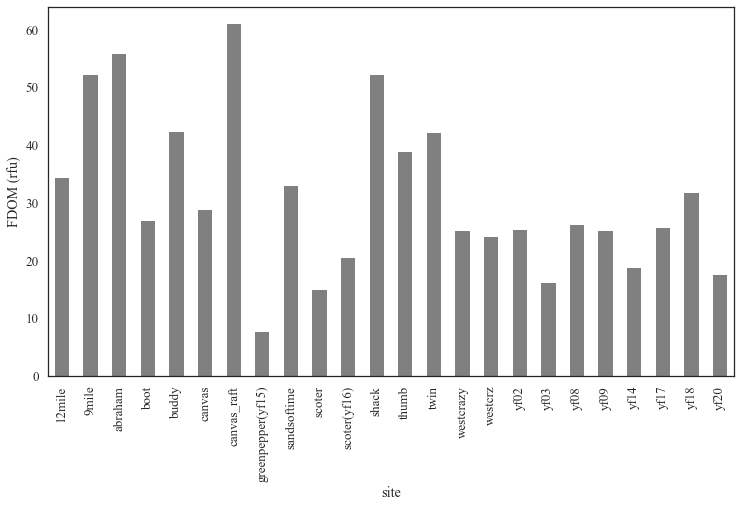

In [12]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style() 

inSitu.groupby(['site'])['fdom.rfu'].mean().plot(kind='bar', color = 'grey')
plt.ylabel('FDOM (rfu)')


plt.tight_layout()


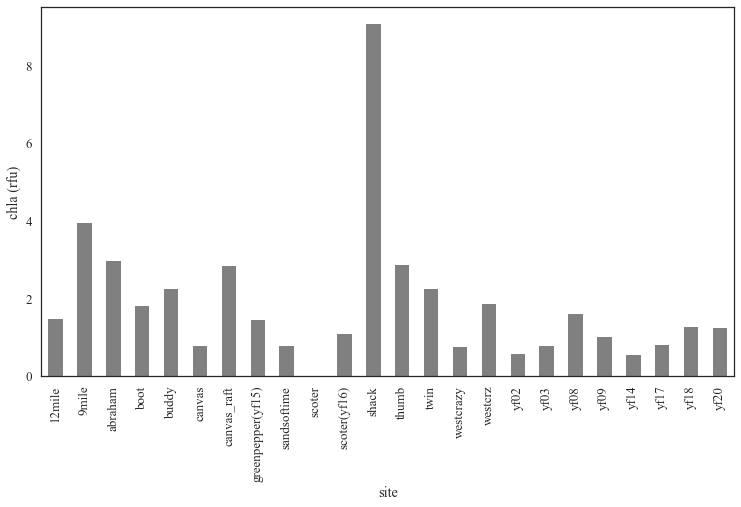

In [41]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

inSitu.groupby(['site'])['chla.rfu'].mean().plot(kind='bar', color = 'grey')
plt.ylabel('chla (rfu)')


plt.tight_layout()


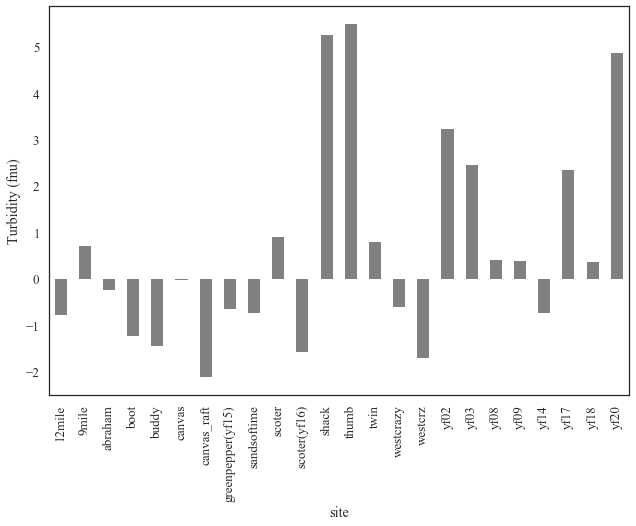

In [42]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

inSitu.groupby(['site'])['turb.fnu'].mean().plot(kind='bar', color = 'grey')

plt.ylabel('Turbidity (fnu)')


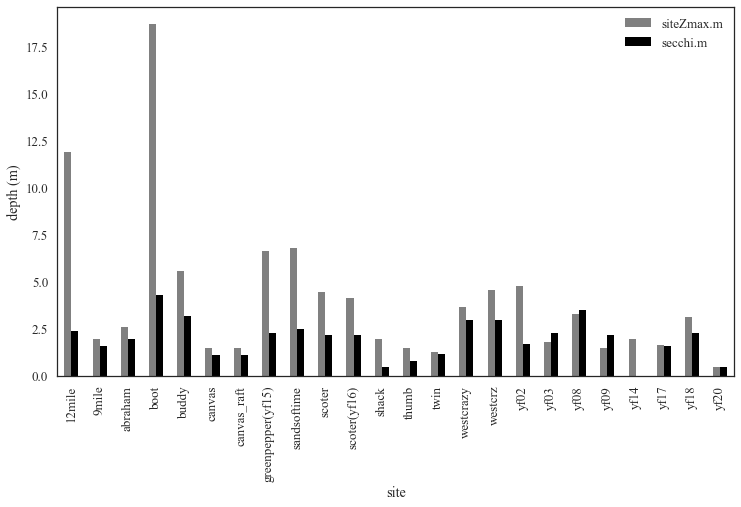

In [43]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

inSitu.groupby(['site'])['siteZmax.m', 'secchi.m'].mean().plot(kind='bar', colors = 
                                                              ['grey', 'black'])
plt.ylabel('depth (m)')

plt.tight_layout()

In [46]:
inSitu['tooDeep'] = inSitu['siteZmax.m'] - inSitu['secchi.m']

In [52]:
inSitu.groupby('site')['tooDeep'].mean()

site
12mile                9.533333
9mile                 0.366667
abraham               0.633333
boot                 14.433333
buddy                 2.400000
canvas                0.400000
canvas_raft           0.400000
greenpepper(yf15)     4.333333
sandsoftime           4.333333
scoter                2.300000
scoter(yf16)          1.950000
shack                 1.466667
thumb                 0.700000
twin                  0.100000
westcrazy             0.700000
westcrz               1.600000
yf02                  3.100000
yf03                 -0.500000
yf08                 -0.200000
yf09                 -0.700000
yf14                       NaN
yf17                  0.050000
yf18                  0.833333
yf20                  0.000000
Name: tooDeep, dtype: float64

In [73]:
inSitu.groupby(['trip', 'site'])['chla.rfu'].mean()

trip  site             
3     12mile                1.08
      9mile                 1.37
      abraham               3.24
      boot                  1.07
      canvas                0.78
      greenpepper(yf15)     0.38
      sandsoftime           0.81
      scoter(yf16)          0.43
      shack                 7.38
      thumb                 3.25
      twin                  2.24
      westcrazy             0.74
      yf02                  0.57
      yf03                  0.78
      yf08                  1.60
      yf09                  1.01
      yf14                  0.76
      yf17                  0.80
      yf18                  1.39
      yf20                  1.25
4     12mile                 NaN
      9mile                  NaN
      abraham                NaN
      boot                   NaN
      buddy                  NaN
      canvas                 NaN
      greenpepper(yf15)      NaN
      sandsoftime            NaN
      scoter                 NaN
      shack        

In [74]:
shackDrop = inSitu[inSitu.site != 'shack']
shackDrop.groupby(['trip', 'site'])['chla.rfu'].mean()

trip  site             
3     12mile               1.08
      9mile                1.37
      abraham              3.24
      boot                 1.07
      canvas               0.78
      greenpepper(yf15)    0.38
      sandsoftime          0.81
      scoter(yf16)         0.43
      thumb                3.25
      twin                 2.24
      westcrazy            0.74
      yf02                 0.57
      yf03                 0.78
      yf08                 1.60
      yf09                 1.01
      yf14                 0.76
      yf17                 0.80
      yf18                 1.39
      yf20                 1.25
4     12mile                NaN
      9mile                 NaN
      abraham               NaN
      boot                  NaN
      buddy                 NaN
      canvas                NaN
      greenpepper(yf15)     NaN
      sandsoftime           NaN
      scoter                NaN
      thumb                 NaN
      twin                  NaN
      westcrz   

/Users/ckuhn/anaconda2/envs/vectorenv/lib/python2.7/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


/Users/ckuhn/Documents/ABOVE/Figures


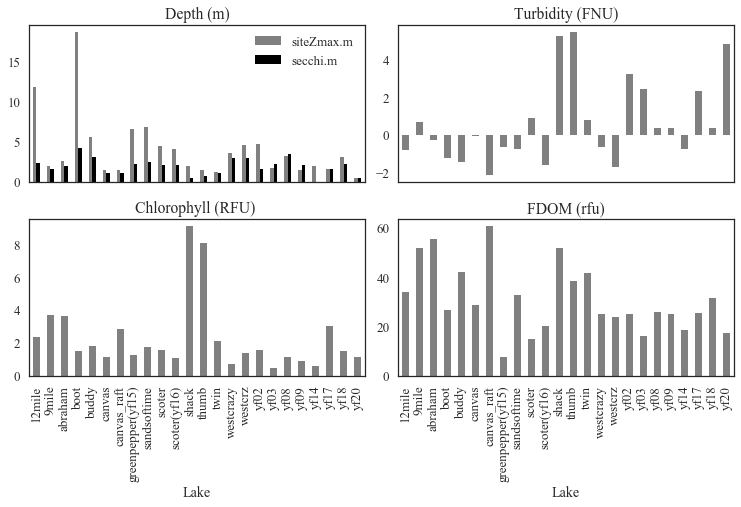

In [13]:
fig, ax = plt.subplots(2, 2)


inSitu.groupby(['site'])['siteZmax.m', 'secchi.m'].mean().plot(kind='bar', color = 
                                                              ['grey', 'black'], ax = ax[0,0])
ax[0, 0].set_xlabel('')
ax[0, 0].set_title('Depth (m)')
ax[0, 0].set_xticklabels([])

inSitu.groupby(['site'])['turb.fnu'].mean().plot(kind='bar', color = 'grey', ax=ax[0, 1])
ax[0, 1].set_xlabel('')
ax[0, 1].set_title('Turbidity (FNU)')
ax[0, 1].set_xticklabels([])


inSitu.groupby(['site'])['chla.rfu'].mean().plot(kind='bar', color = 'grey', ax=ax[1, 0])
ax[1, 0].set_xlabel('Lake')
ax[1, 0].set_title('Chlorophyll (RFU) ')

inSitu.groupby(['site'])['fdom.rfu'].mean().plot(kind='bar', color = 'grey', ax=ax[1, 1])
ax[1, 1].set_xlabel('Lake')
ax[1, 1].set_title('FDOM (rfu)')
#ax[1, 1].set_xticklabels(labels)

plt.tight_layout()

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('FieldData_Barplots_BasicOptics.png', dpi = 300)

In [ ]:
9mport seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
kws = dict(s=50, linewidth=.5, edgecolor="w")
pal = ['red', 'green', 'blue', 'red', 'green', 'blue',]
g = sns.FacetGrid(tips, col="sex", hue="size", palette=pal, hue_kws=dict(marker=["^", "^", "^", "v", "v", "v"]))
g = (g.map(plt.scatter, "total_bill", "tip", **kws).add_legend())

plt.show()

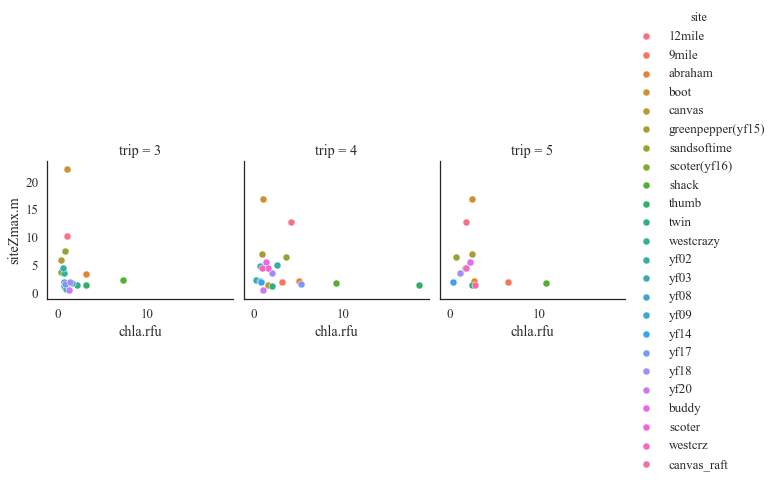

In [43]:
kws = dict(s=50, linewidth=.5, edgecolor="w")

g = sns.FacetGrid(inSitu, col='trip', hue='site')

g = (g.map(plt.scatter, "chla.rfu", "siteZmax.m", **kws).add_legend())

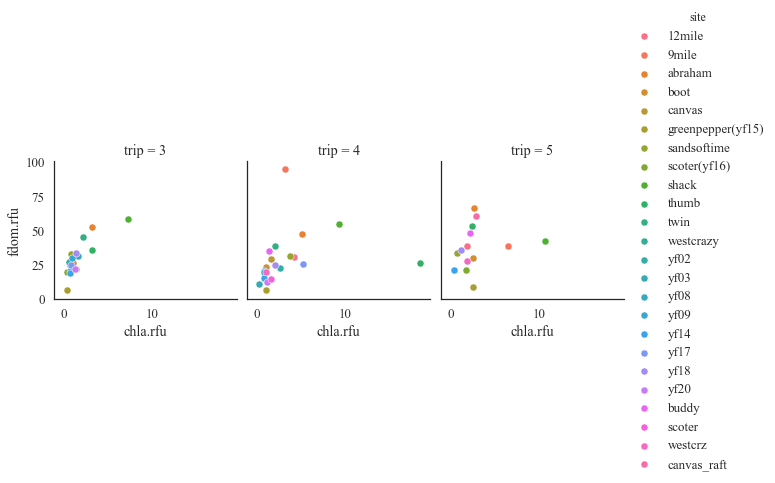

In [44]:
kws = dict(s=50, linewidth=.5, edgecolor="w")

g = sns.FacetGrid(inSitu, col='trip', hue='site')

g = (g.map(plt.scatter, "chla.rfu", "fdom.rfu", **kws).add_legend())

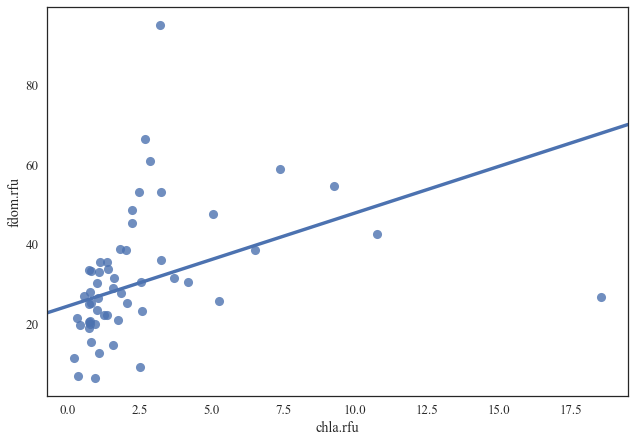

In [39]:
ax = sns.regplot(x, y, data=inSitu, robust=True, ci=None)

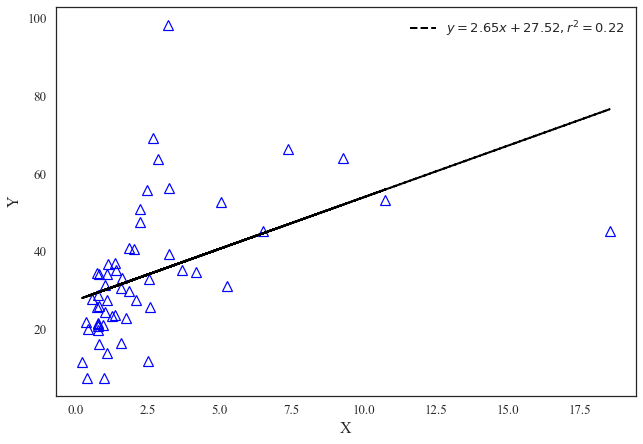

In [41]:
#https://quantumchemistryniser.wordpress.com/2015/02/22/linear-regression-in-python/
ynew = x + y
####
def LIP(x,y,xlab="X",ylab="Y"):
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    m,c,r,p,se1=stats.linregress(x,ynew)
    fig=plt.figure()
    cm1lab="$"+('y=%2.2fx+%2.2f, r^2=%1.2f'%(m,c,r**2))+"$";
    plt.plot(x,y,'^',mfc='none',mec='b',mew=1.2)
    plt.plot(x, m*x+c,'k--',linewidth=2,label=cm1lab)
    plt.ylabel(ylab,fontsize=16)
    plt.xlabel(xlab,fontsize=16)
    plt.legend( loc='upper right')
    return(fig)
#### CALL THE FUNCTION TO GET THE FIGURE
LIP(x,ynew)
####
plt.show()

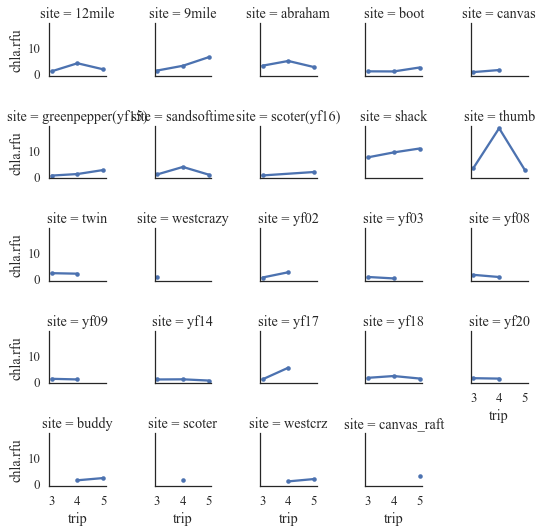

In [61]:
#attend = sns.load_dataset("attention")
g = sns.FacetGrid(inSitu, col="site", col_wrap=5, size=1.5)
g = g.map(plt.plot, "trip", "chla.rfu", marker=".")

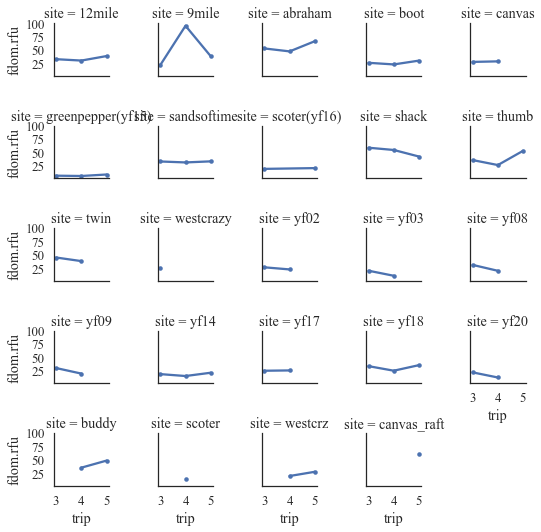

In [63]:
g = sns.FacetGrid(inSitu, col="site", col_wrap=5, size=1.5)
g = g.map(plt.plot, "trip", "fdom.rfu", marker=".")

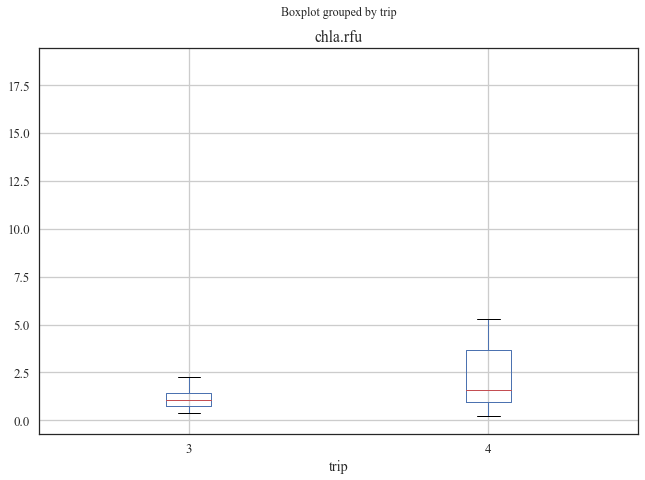

In [84]:
df = inSitu.loc[inSitu['trip'] != 5]
 
df.boxplot(column='chla.rfu', by='trip')